An ant leaves its anthill in order to forage for food. It moves with the speed of 10cm per second, but it doesn’t know where to go, therefore every second it moves randomly 10cm directly north, south, east or west with equal probability.





1.   If the food is located on east-west lines 20cm to the north and 20cm to the
south, as well as on north-south lines 20cm to the east and 20cm to the west from the anthill, how long will it take the ant to reach it on average?
2.   What is the average time the ant will reach food if it is located only on a diagonal line passing through (10cm, 0cm) and (0cm, 10cm) points?
3. Can you write a program that comes up with an estimate of average time to find food for any closed boundary around the anthill? What would be the answer if food is located outside an defined by $(\frac{x – 2.5\:cm}{30\:cm})^2 + (\frac{y – 2.5\:cm}{30\:cm})^2 < 1$  in coordinate system where the anthill is located at $(x = 0,\: y = 0)$? Provide us with a solution rounded to the nearest integer.





**Question 1**

In [33]:
import random
import pylab

In [11]:
def randomwalk2D(x,y):
    directions = ["UP", "DOWN", "LEFT", "RIGHT"]
    # Pick a direction at random
    step = random.choice(directions)

    # Move the object according to the direction
    if step == "RIGHT":
        x +=10
    elif step == "LEFT":
        x-= 10
    elif step == "UP":
        y+=10
    elif step == "DOWN":
        y-=10
    # Return all the x and y positions of the object
    return x, y

2D random walk has the following representation

In [51]:
N = 10000
D = [(0,0)]
for _ in range(N):
  D.append(randomwalk2D(*D[-1]))


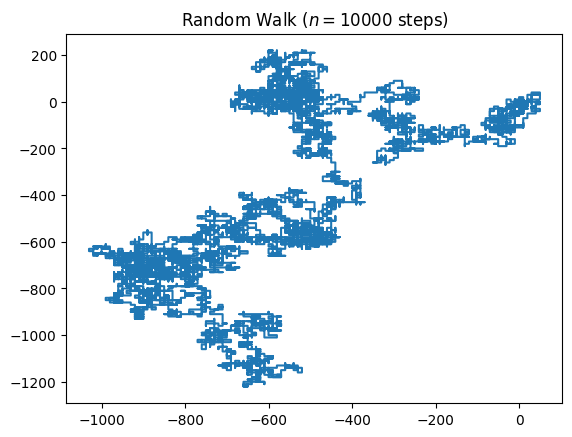

In [52]:
pylab.title("Random Walk ($n = " + str(N) + "$ steps)")
pylab.plot(list(zip(*D))[0],list(zip(*D))[1])
pylab.show()

In [45]:
list(zip(*D))[0]

(0, 10, 10, 20, 30, 40, 30, 30, 30, 40, 50)

In [92]:
def Q1(N):
  I=[]
  for i in range(N):
      Coordinates=(0,0)
      i=0
      while abs(Coordinates[0]) < 20 and abs(Coordinates[1]) < 20:
            Coordinates = (randomwalk2D(*Coordinates))
            i+=1
      I.append(i)
  return sum(I)/N

In [95]:
N = 100_00
M = 100
R = [Q1(N) for _ in range(M)]


In [96]:
T = sum(R)/len(R)
T

4.499464

Answer to question 1: On average an ant would reach food in $T$ seconds.

**Question 2**

In [70]:
def Q2(N,lim):
  I=[]
  for i in range(N):
      Coordinates=(0,0)
      i=0
      while (Coordinates[0] + Coordinates[1] != 10) and i <lim :
            Coordinates = (randomwalk2D(*Coordinates))
            i+=1
      if (Coordinates[0] + Coordinates[1] == 10): I.append(i)
  return sum(I)/N

In [80]:
N = 20_000
X = list(range(1_000,101_001,10_000))
R = [Q2(N,lim) for lim in X]

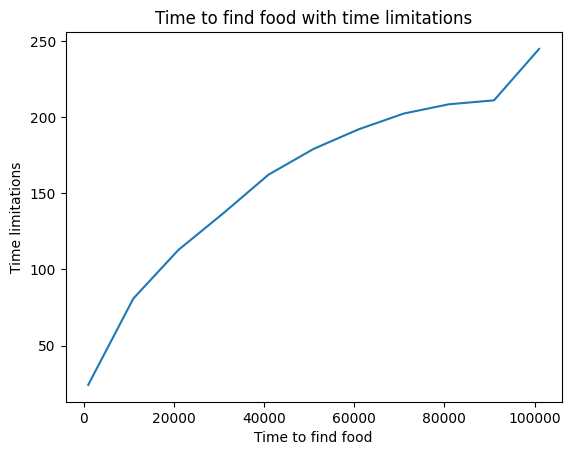

In [85]:
pylab.title("Time to find food with time limitations")
pylab.plot(X,R)
pylab.xlabel("Time to find food")
pylab.ylabel("Time limitations")
pylab.show()

Answer to question 2:
As it can be seen in the figure the average time increases with time
bounds. Therefore, if the time is unlimited the average time will tend
to infinity. Answer: Time tends to infinity.

**Question 3**

In [18]:
def Bond(x,y):
  return ((x-2.5)/30)**2 + ((y-2.5)/40)**2 < 1

In [19]:
def Q3(N):
  I=[]
  for i in range(N):
      Coordinates=(0,0)
      i=0
      while Bond(Coordinates[0],Coordinates[1]):
            Coordinates = (randomwalk2D(*Coordinates))
            i+=1
      I.append(i)
  return sum(I)/N

In [21]:
N = 100_0
M = 100
R = [Q3(N) for _ in range(M)]

In [22]:
T = sum(R)/len(R)
T

14.014149999999999

Answer to question 3: On average it takes 14 seconds for ants to find
food.
5

An ilustration for question 3

In [35]:

def Ellipse(x):
  return 40*(1 - ((x-2.5)/30)**2)**0.5 + 2.5

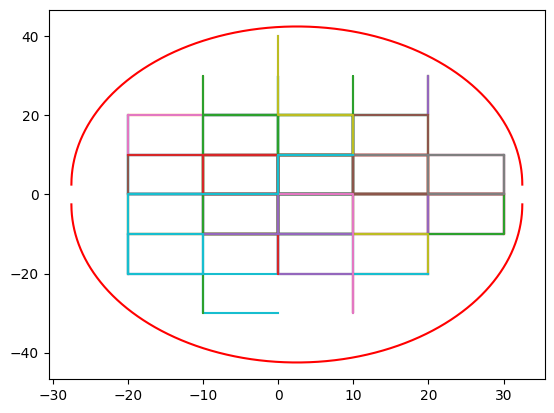

In [65]:
import numpy as np
x = np.linspace(-27.5,32.5,100000)
y1 = [Ellipse(i) for i in x]
y2 = [-Ellipse(i) for i in x]
N = 50
for i in range(N):
    Coordinates=[(0,0)]
    while Bond(Coordinates[-1][0],Coordinates[-1][1]):
          Coordinates.append(randomwalk2D(*Coordinates[-1]))
    pylab.plot(list(zip(*Coordinates[:-1]))[0],list(zip(*Coordinates[:-1]))[1])

pylab.plot(x,y1, c = "r")
pylab.plot(x,y2,c = "r")
pylab.show()
